In [2]:
import requests
import os
import pandas

In [15]:
pip install wordcloud networkx

Note: you may need to restart the kernel to use updated packages.


In [12]:
import os

os.makedirs("../data", exist_ok=True)

texts = {
    "Plato_Republic": """
    Justice is having and doing what is one's own. The heaviest penalty for declining to rule is to be ruled by someone inferior to yourself.
    We can easily forgive a child who is afraid of the dark; the real tragedy of life is when men are afraid of the light.
    Music gives a soul to the universe, wings to the mind, flight to the imagination, and life to everything.
    The measure of a man is what he does with power. Only the dead have seen the end of war.
    No one is more hated than he who speaks the truth. The truth is rarely pure and never simple.
    Knowledge is the food of the soul. Ignorance is the root and stem of all evil.
    """,

    "Nietzsche_Zarathustra": """
    God is dead. God remains dead. And we have killed him. What was holiest and mightiest of all that the world has yet owned has bled to death under our knives.
    One must still have chaos in oneself to be able to give birth to a dancing star.
    That which does not kill us makes us stronger. Without music, life would be a mistake.
    Man is something that shall be overcome. What is great in man is that he is a bridge and not an end.
    The higher we soar, the smaller we appear to those who cannot fly. In individuals, insanity is rare.
    He who has a why to live can bear almost any how. To live is to suffer, to survive is to find some meaning in the suffering.
    """,

    "Kant_Pure_Reason": """
    Act only according to that maxim whereby you can at the same time will that it should become a universal law.
    Two things fill the mind with ever new and increasing admiration and awe, the starry heavens above me and the moral law within me.
    Science is organized knowledge. Wisdom is organized life. All our knowledge begins with the senses.
    Enlightenment is man's emergence from his self-imposed immaturity. Immaturity is the inability to use one's understanding without guidance from another.
    Happiness is not an ideal of reason but of imagination. We are not rich by what we possess but by what we can do without.
    Space and time are the framework within which the mind is constrained to construct its experience of reality.
    """,

    "Aristotle_Ethics": """
    Happiness is the meaning and the purpose of life, the whole aim and end of human existence.
    We are what we repeatedly do. Excellence, then, is not an act, but a habit.
    The more you know, the more you know you don't know. It is the mark of an educated mind to be able to entertain a thought without accepting it.
    Knowing yourself is the beginning of all wisdom. Quality is not an act, it is a habit.
    The whole is more than the sum of its parts. Man is by nature a social animal.
    Pleasure in the job puts perfection in the work. Hope is a waking dream.
    """,

    "Descartes_Meditations": """
    I think, therefore I am. The reading of all good books is like a conversation with the finest minds of past centuries.
    It is not enough to have a good mind. The main thing is to use it well.
    Divide each difficulty into as many parts as is feasible and necessary to resolve it.
    The first precept was to accept nothing as true which I did not clearly know to be such.
    Cogito ergo sum. Doubt is the origin of wisdom. I would give all my fame for a pot of ale and safety.
    The greatest minds are capable of the greatest vices as well as of the greatest virtues.
    """,

    "Hume_Human_Understanding": """
    Beauty in things exists in the mind which contemplates them. Reason is the slave of the passions.
    Custom is the great guide of human life. The life of man is of no greater importance to the universe than that of an oyster.
    A wise man proportions his belief to the evidence. Generally speaking, the errors in religion are dangerous; those in philosophy only ridiculous.
    It is not reason which is the guide of life, but custom. Habit and custom have a mighty influence over mankind.
    No testimony is sufficient to establish a miracle unless the testimony be of such a kind that its falsehood would be more miraculous than the fact.
    Morals excite passions and produce or prevent actions. Reason of itself is utterly impotent in this particular.
    """
}

for name, text in texts.items():
    path = f"../data/{name}.txt"
    with open(path, "w", encoding="utf-8") as f:
        f.write(text.strip())
    print(f"Created: {name}.txt ✓")

print("\nAll files ready! Check your data/ folder.")

Created: Plato_Republic.txt ✓
Created: Nietzsche_Zarathustra.txt ✓
Created: Kant_Pure_Reason.txt ✓
Created: Aristotle_Ethics.txt ✓
Created: Descartes_Meditations.txt ✓
Created: Hume_Human_Understanding.txt ✓

All files ready! Check your data/ folder.


In [13]:
import os
import re
import pandas as pd
import nltk

# Download stopwords (only needed once)
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# --- LOAD AND CLEAN FUNCTION ---
def load_and_clean(filepath):
    """
    Loads a text file and cleans it:
    - lowercase
    - remove punctuation & numbers
    - remove stopwords
    """
    with open(filepath, "r", encoding="utf-8") as f:
        text = f.read()
    
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and numbers (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize (split into individual words)
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Join back into a single clean string
    clean_text = ' '.join(words)
    
    return clean_text

# --- LOAD ALL PHILOSOPHERS ---
data_folder = "../data"
philosophers_data = {}

for filename in os.listdir(data_folder):
    if filename.endswith(".txt"):
        name = filename.replace(".txt", "")
        filepath = os.path.join(data_folder, filename)
        philosophers_data[name] = load_and_clean(filepath)
        print(f"Loaded & cleaned: {name} ✓")

# --- CONVERT TO DATAFRAME ---
df = pd.DataFrame({
    "philosopher": list(philosophers_data.keys()),
    "clean_text": list(philosophers_data.values())
})

print(f"\nDataset shape: {df.shape}")
print("\n--- PREVIEW (first 200 characters of each) ---\n")
for _, row in df.iterrows():
    print(f"{row['philosopher']}:")
    print(f"  {row['clean_text'][:200]}")
    print()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nipun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nipun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Loaded & cleaned: Aristotle_Ethics ✓
Loaded & cleaned: Descartes_Meditations ✓
Loaded & cleaned: Hume_Human_Understanding ✓
Loaded & cleaned: Kant_Pure_Reason ✓
Loaded & cleaned: Nietzsche_Zarathustra ✓
Loaded & cleaned: Plato_Republic ✓

Dataset shape: (6, 2)

--- PREVIEW (first 200 characters of each) ---

Aristotle_Ethics:
  happiness meaning purpose life whole aim end human existence repeatedly excellence act habit know know dont know mark educated mind able entertain thought without accepting knowing beginning wisdom qu

Descartes_Meditations:
  think therefore reading good books like conversation finest minds past centuries enough good mind main thing use well divide difficulty many parts feasible necessary resolve first precept accept nothi

Hume_Human_Understanding:
  beauty things exists mind contemplates reason slave passions custom great guide human life life man greater importance universe oyster wise man proportions belief evidence generally speaking errors re

Kant_Pure_R

Matrix shape: (6, 255)
Each philosopher is now represented as a vector of 255 unique words

--- SIMILARITY MATRIX ---
                          Aristotle Ethics  Descartes Meditations  \
Aristotle Ethics                     1.000                  0.077   
Descartes Meditations                0.077                  1.000   
Hume Human Understanding             0.065                  0.011   
Kant Pure Reason                     0.076                  0.026   
Nietzsche Zarathustra                0.061                  0.019   
Plato Republic                       0.032                  0.005   

                          Hume Human Understanding  Kant Pure Reason  \
Aristotle Ethics                             0.065             0.076   
Descartes Meditations                        0.011             0.026   
Hume Human Understanding                     1.000             0.058   
Kant Pure Reason                             0.058             1.000   
Nietzsche Zarathustra                 

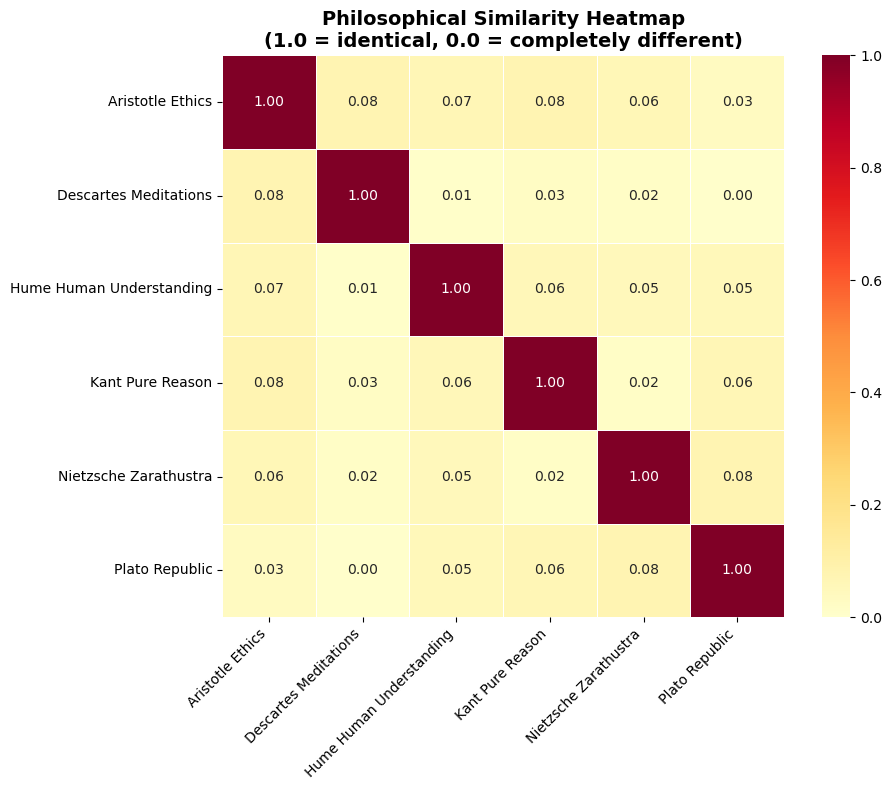


Heatmap saved to data/ folder ✓


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- STEP 1: CONVERT TEXT TO NUMBERS USING TF-IDF ---
# TF-IDF = Term Frequency-Inverse Document Frequency
# It gives higher weight to words that are unique to a philosopher
# and lower weight to words that appear in everyone's text

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])

print(f"Matrix shape: {tfidf_matrix.shape}")
print(f"Each philosopher is now represented as a vector of {tfidf_matrix.shape[1]} unique words\n")

# --- STEP 2: CALCULATE SIMILARITY BETWEEN ALL PAIRS ---
similarity_matrix = cosine_similarity(tfidf_matrix)

# Convert to a readable DataFrame
philosopher_names = [name.replace("_", " ") for name in df['philosopher']]
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=philosopher_names,
    columns=philosopher_names
)

print("--- SIMILARITY MATRIX ---")
print(similarity_df.round(3))

# --- STEP 3: FIND THE MOST SIMILAR PAIRS ---
print("\n--- TOP PHILOSOPHER PAIRS BY SIMILARITY ---\n")

pairs = []
for i in range(len(philosopher_names)):
    for j in range(i+1, len(philosopher_names)):  # avoid duplicates
        pairs.append({
            "Philosopher 1": philosopher_names[i],
            "Philosopher 2": philosopher_names[j],
            "Similarity": round(similarity_matrix[i][j], 4)
        })

pairs_df = pd.DataFrame(pairs).sort_values("Similarity", ascending=False)
print(pairs_df.to_string(index=False))

# --- STEP 4: VISUALIZE AS A HEATMAP ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_df,
    annot=True,           # show numbers in each cell
    fmt=".2f",            # 2 decimal places
    cmap="YlOrRd",        # yellow to red color scale
    vmin=0, vmax=1,       # similarity range
    linewidths=0.5,
    square=True
)
plt.title("Philosophical Similarity Heatmap\n(1.0 = identical, 0.0 = completely different)", 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../data/similarity_heatmap.png", dpi=150)
plt.show()
print("\nHeatmap saved to data/ folder ✓")

Generating word clouds...


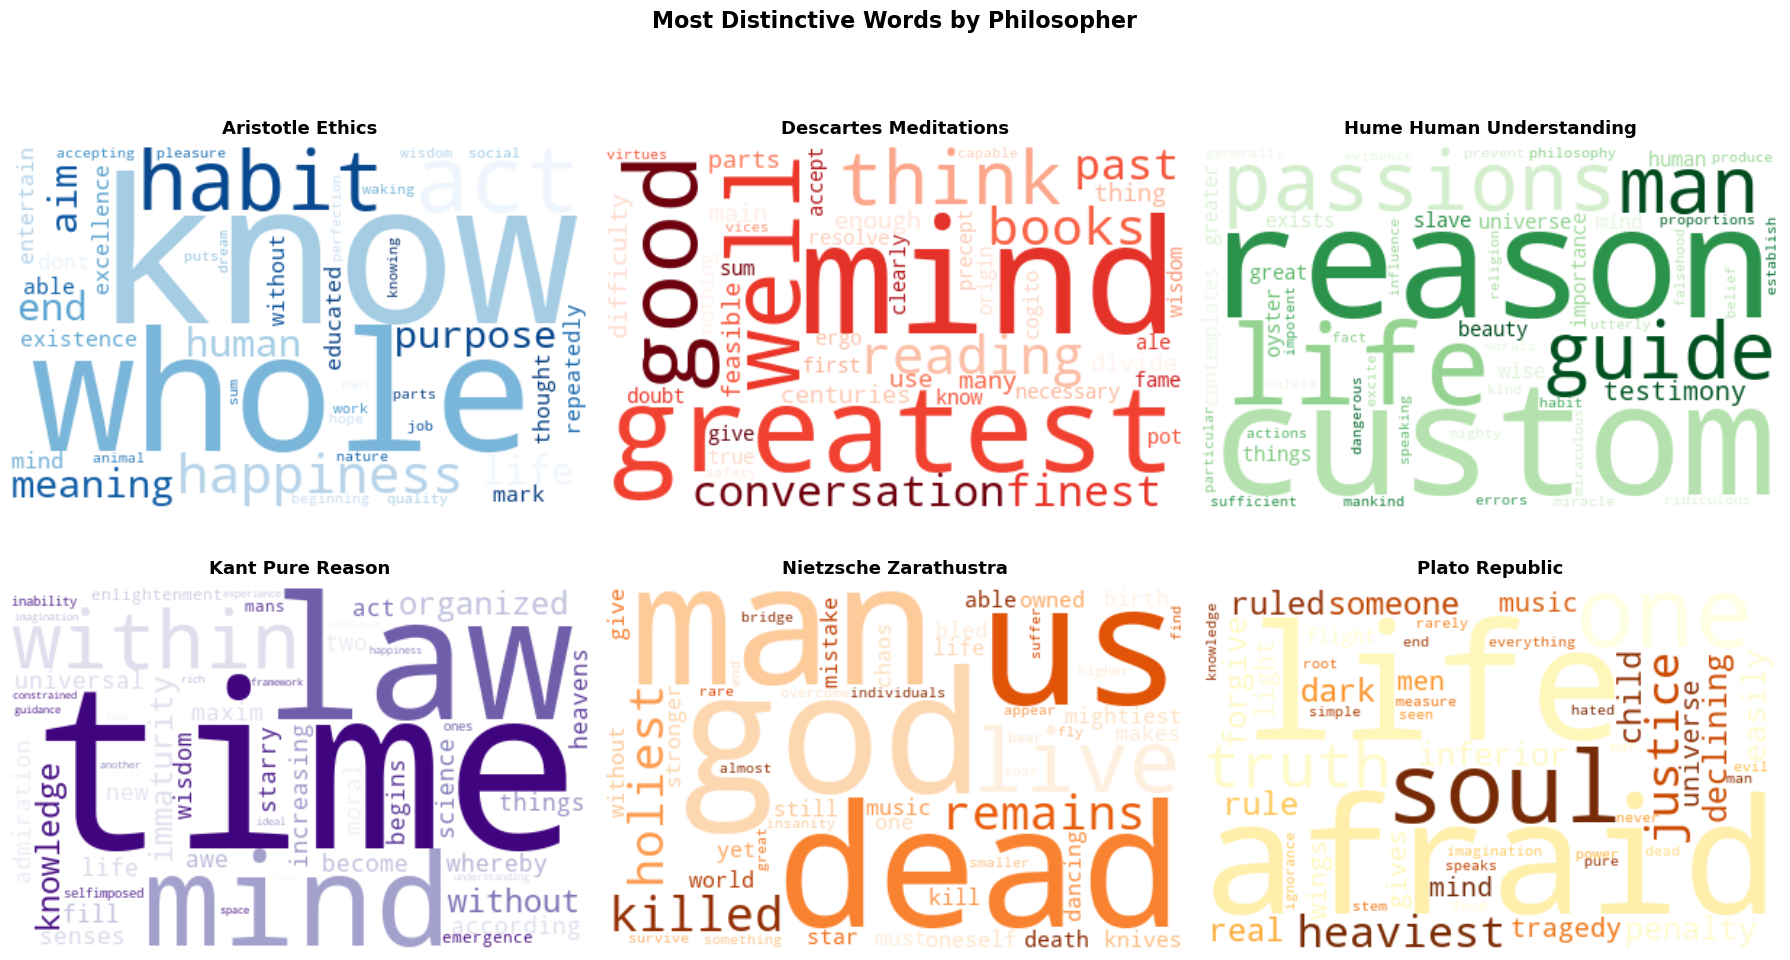

Word clouds saved ✓

Generating network graph...


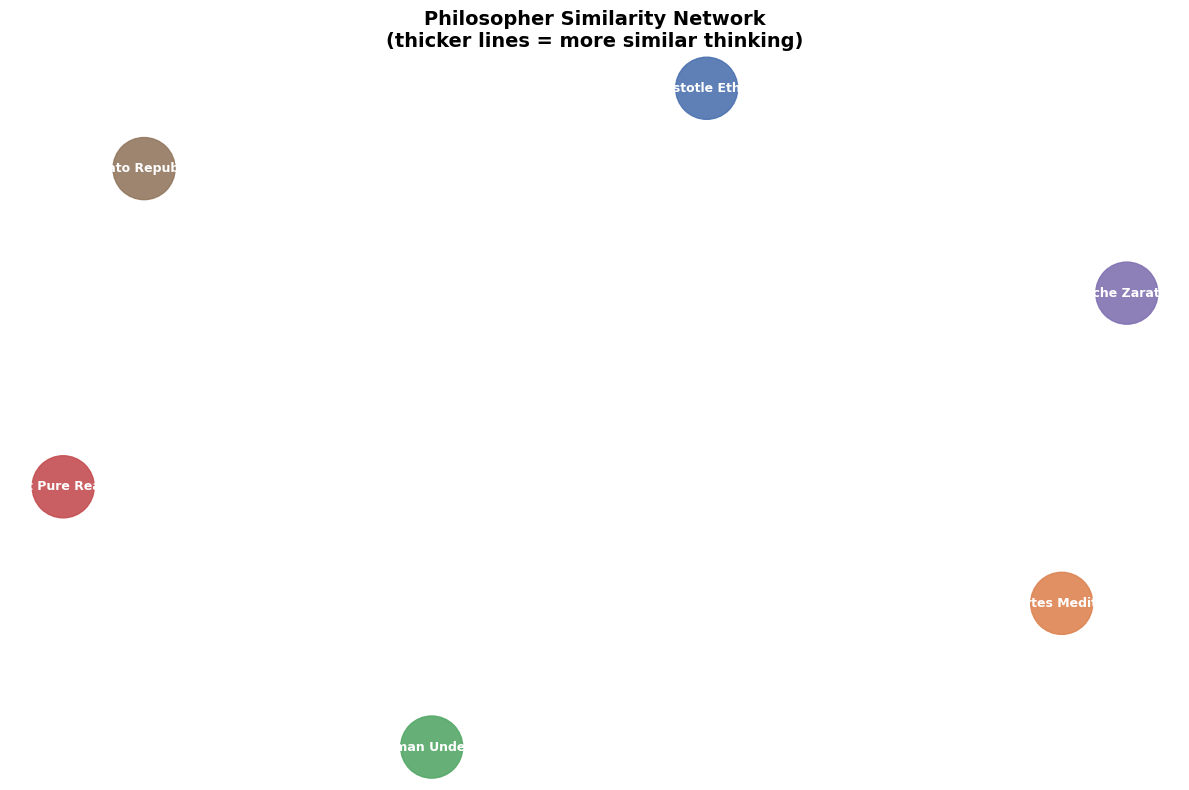

Network graph saved ✓

   FINAL FINDINGS: WHO THINKS MOST ALIKE?

#1 Aristotle Ethics & Descartes Meditations
    Similarity Score: 0.0771

#2 Aristotle Ethics & Kant Pure Reason
    Similarity Score: 0.0763

#3 Nietzsche Zarathustra & Plato Republic
    Similarity Score: 0.0762

Most DIFFERENT philosophers:
  Descartes Meditations & Plato Republic (Score: 0.0046)

All visualizations saved to data/ folder!


In [17]:
from wordcloud import WordCloud
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# ============================================================
# VISUALIZATION 1: WORD CLOUDS FOR EACH PHILOSOPHER
# ============================================================

print("Generating word clouds...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

colors = ['Blues', 'Reds', 'Greens', 'Purples', 'Oranges', 'YlOrBr']

for i, (_, row) in enumerate(df.iterrows()):
    wordcloud = WordCloud(
        width=400,
        height=250,
        background_color='white',
        colormap=colors[i],
        max_words=50,
        prefer_horizontal=0.9
    ).generate(row['clean_text'])
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(
        row['philosopher'].replace('_', ' '), 
        fontsize=13, 
        fontweight='bold',
        pad=10
    )

plt.suptitle("Most Distinctive Words by Philosopher", 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig("../data/wordclouds.png", dpi=150, bbox_inches='tight')
plt.show()
print("Word clouds saved ✓\n")


# ============================================================
# VISUALIZATION 2: NETWORK GRAPH OF PHILOSOPHER SIMILARITY
# ============================================================

print("Generating network graph...")

# Build graph — only connect philosophers above similarity threshold
G = nx.Graph()

# Add nodes
for name in philosopher_names:
    G.add_node(name)

# Add edges where similarity is meaningful (above 0.1)
threshold = 0.1
for i in range(len(philosopher_names)):
    for j in range(i+1, len(philosopher_names)):
        sim = similarity_matrix[i][j]
        if sim > threshold:
            G.add_edge(philosopher_names[i], philosopher_names[j], weight=sim)

# Draw the graph
plt.figure(figsize=(12, 8))

# Position nodes in a circle
pos = nx.spring_layout(G, seed=42, k=2)

# Edge thickness based on similarity strength
edges = G.edges(data=True)
weights = [d['weight'] * 10 for _, _, d in edges]

# Node colors
node_colors = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B2', '#937860']

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', font_color='white')
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='gray')

# Add edge labels showing similarity scores
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

plt.title("Philosopher Similarity Network\n(thicker lines = more similar thinking)", 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig("../data/network_graph.png", dpi=150)
plt.show()
print("Network graph saved ✓\n")


# ============================================================
# VISUALIZATION 3: FINAL SUMMARY — TOP 3 MOST SIMILAR PAIRS
# ============================================================

print("=" * 55)
print("   FINAL FINDINGS: WHO THINKS MOST ALIKE?")
print("=" * 55)

top3 = pairs_df.head(3)
for rank, (_, row) in enumerate(top3.iterrows(), 1):
    print(f"\n#{rank} {row['Philosopher 1']} & {row['Philosopher 2']}")
    print(f"    Similarity Score: {row['Similarity']}")

print("\nMost DIFFERENT philosophers:")
bottom = pairs_df.tail(1).iloc[0]
print(f"  {bottom['Philosopher 1']} & {bottom['Philosopher 2']} "
      f"(Score: {bottom['Similarity']})")

print("\n" + "=" * 55)
print("All visualizations saved to data/ folder!")
print("=" * 55)